## For Only Deeplearning Model

In [4]:
from tensorflow.keras.models import load_model
import numpy as np
from skimage.transform import resize
import imageio

# Load the saved model
model_path = 'resnet/resnet_model.h5'
loaded_model = load_model(model_path)
print("Model loaded successfully.")

# Function to preprocess the new image
def preprocess_image(image_path):
    MAX_WIDTH = 100
    MAX_HEIGHT = 100
    image = imageio.imread(image_path)
    image = resize(image, (MAX_WIDTH, MAX_HEIGHT))
    image = 255 * image
    image = image.astype(np.uint8)
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    image = np.expand_dims(image, axis=-1)  # Add channel dimension
    image = normalize_it(image)
    return image

# Function to normalize the image
def normalize_it(X):
    v_min = X.min(axis=(1, 2, 3), keepdims=True)
    v_max = X.max(axis=(1, 2, 3), keepdims=True)
    range_values = np.where((v_max - v_min) == 0, np.finfo(float).eps, v_max - v_min)
    X_normalized = (X - v_min) / range_values
    return X_normalized
    
# List of words corresponding to the class indices
words = ['Begin', 'Choose', 'Connection', 'Navigation', 'Next', 'Previous', 'Start', 'Stop', 'Hello', 'Web']

# Example usage with a new image
new_image_path = "D:/Lipreading/concatenated_images(5x5)/F01/words/02/07.jpg"  # Replace with the path to your new image
preprocessed_image = preprocess_image(new_image_path)
prediction = loaded_model.predict(preprocessed_image)

# Get the predicted class
predicted_class_index = np.argmax(prediction, axis=1)[0]
predicted_class_word = words[predicted_class_index]

print(f"Predicted class: {predicted_class_index}")
print(f"Predicted class word: {predicted_class_word}")


C:\Users\satvi\AppData\Local\Temp\ipykernel_11004\767139900.py:15: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(image_path)


Model loaded successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 648ms/step
Predicted class: 6
Predicted class word: Start


## For DL+ML Model

In [10]:
import joblib
from tensorflow.keras.models import load_model
import tkinter as tk
from tkinter import filedialog
import os
import time
import imageio
import numpy as np
from skimage.transform import resize

# Define your custom paths
base_model_path = "model_1/resnet_base_model.h5"
pipeline_classifier_path = "model_1/svm_classifier.pkl"

# Function to load the model and classifier
def load_models(model_path=base_model_path, classifier_path=pipeline_classifier_path):
    base_model = load_model(model_path)
    classifier_pipeline = joblib.load(classifier_path)
    return base_model, classifier_pipeline

def predict_class(new_sample, base_model, classifier_pipeline):
    # Preprocess the new sample
    MAX_WIDTH = 100
    MAX_HEIGHT = 100
    new_sample = resize(new_sample, (MAX_WIDTH, MAX_HEIGHT))
    new_sample = 255 * new_sample
    new_sample = new_sample.astype(np.uint8)
    new_sample = np.expand_dims(new_sample, axis=0)  # Add batch dimension
    new_sample = np.expand_dims(new_sample, axis=-1)  # Add channel dimension
    new_sample = normalize_it(new_sample)

    # Extract features using the Base model
    features = base_model.predict(new_sample)

    # Predict class using the Classifier pipeline
    predicted_class = classifier_pipeline.predict(features)
    return predicted_class

def normalize_it(X):
    v_min = X.min(axis=(1, 2, 3), keepdims=True)
    v_max = X.max(axis=(1, 2, 3), keepdims=True)
    range_values = np.where((v_max - v_min) == 0, np.finfo(float).eps, v_max - v_min)
    X_normalized = (X - v_min) / range_values
    return X_normalized

def select_image_file():
    root = tk.Tk()
    root.withdraw()  # Hide the root window
    file_path = filedialog.askopenfilename(title="Select an image file",
                                           filetypes=[("Image files", "*.jpg")])
    if file_path:  # If a file is selected
        image_data = imageio.imread(file_path)
        return image_data
    else:
        return None

# Example usage
base_model, classifier_pipeline = load_models()
new_image = select_image_file()
words = ['Begin', 'Choose', 'Connection', 'Navigation', 'Next', 'Previous', 'Start', 'Stop', 'Hello', 'Web']

if new_image is not None:
    predicted_class_index = predict_class(new_image, base_model, classifier_pipeline)[0]
    predicted_class_word = words[predicted_class_index]
    print(f"The class of the new sample is: '{predicted_class_index}'")
    print(f"Predicted class word: {predicted_class_word}")
else:
    print("No image selected.")


C:\Users\satvi\AppData\Local\Temp\ipykernel_20400\716075136.py:52: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image_data = imageio.imread(file_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
The class of the new sample is: '9'
Predicted class word: Web


## Graphs

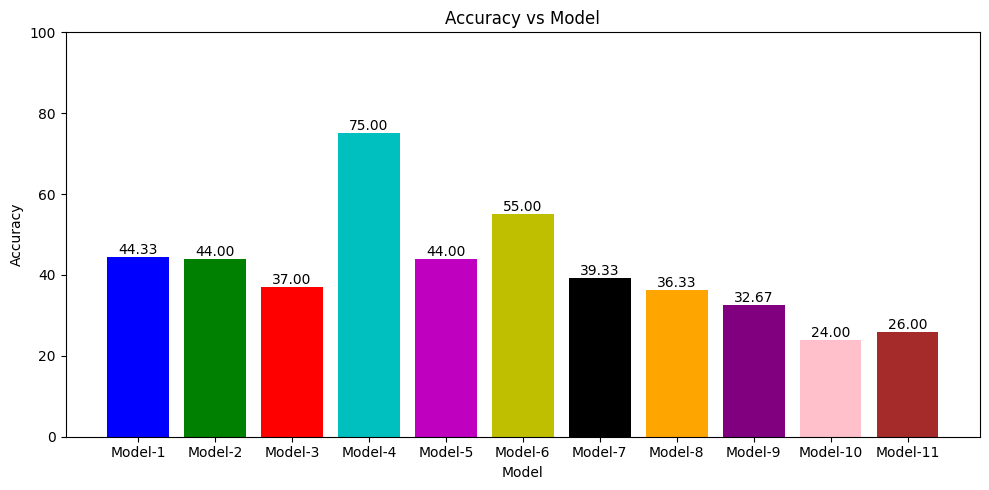

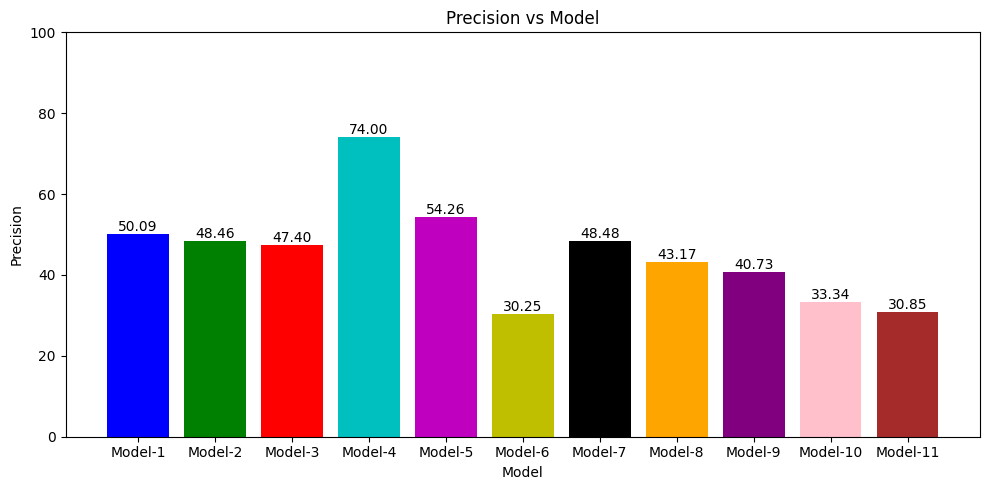

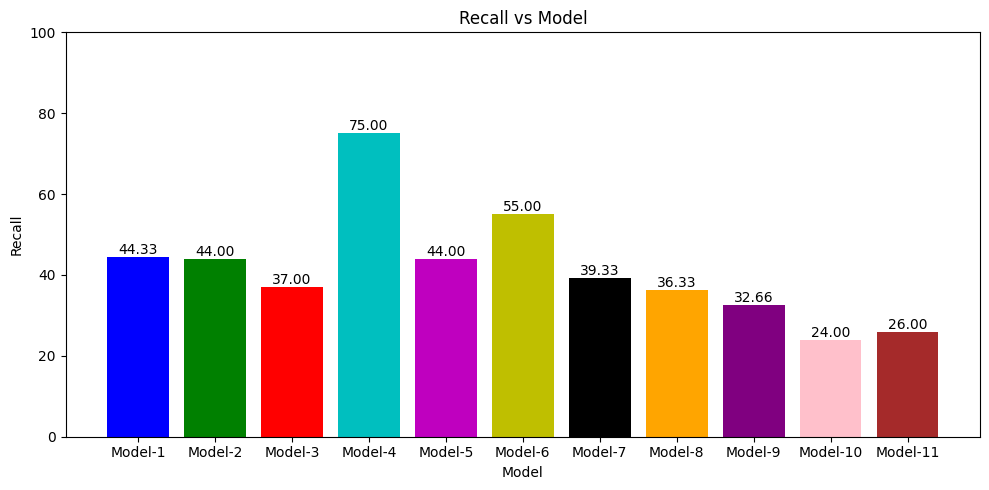

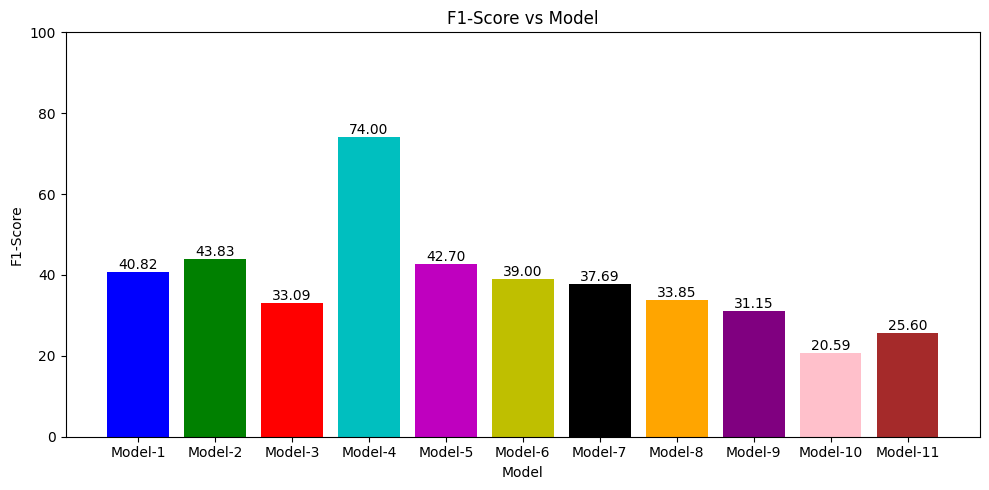

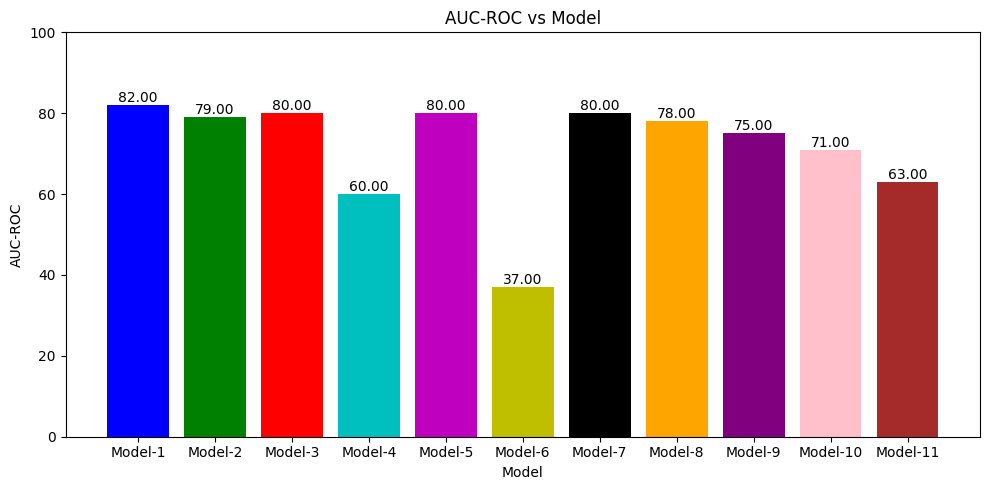

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Model-1', 'Model-2', 'Model-3', 'Model-4', 'Model-5', 'Model-6', 'Model-7', 'Model-8', 'Model-9', 'Model-10', 'Model-11']
accuracy = [44.33, 44, 37, 75, 44, 55, 39.33, 36.33, 32.67, 24, 26]
precision = [50.09, 48.46, 47.4, 74, 54.26, 30.25, 48.48, 43.17, 40.73, 33.34, 30.85]
recall = [44.33, 44, 37, 75, 44, 55, 39.33, 36.33, 32.66, 24, 26]
f1_score = [40.82, 43.83, 33.09, 74, 42.7, 39, 37.69, 33.85, 31.15, 20.59, 25.6]
auc_roc = [82, 79, 80, 60, 80, 37, 80, 78, 75, 71, 63]

# Colors for different models
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink', 'brown']

# Function to create bar plots
def create_bar_plot(values, y_label, title):
    x = np.arange(len(models))
    plt.figure(figsize=(10, 5))
    bars = plt.bar(x, values, color=colors)
    plt.xticks(x, models, rotation=0)
    plt.xlabel('Model')
    plt.ylabel(y_label)
    plt.ylim(0, 100)
    plt.title(title)
    
    # Adding the values on top of the bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

# Plotting
create_bar_plot(accuracy, 'Accuracy', 'Accuracy vs Model')
create_bar_plot(precision, 'Precision', 'Precision vs Model')
create_bar_plot(recall, 'Recall', 'Recall vs Model')
create_bar_plot(f1_score, 'F1-Score', 'F1-Score vs Model')
create_bar_plot(auc_roc, 'AUC-ROC', 'AUC-ROC vs Model')


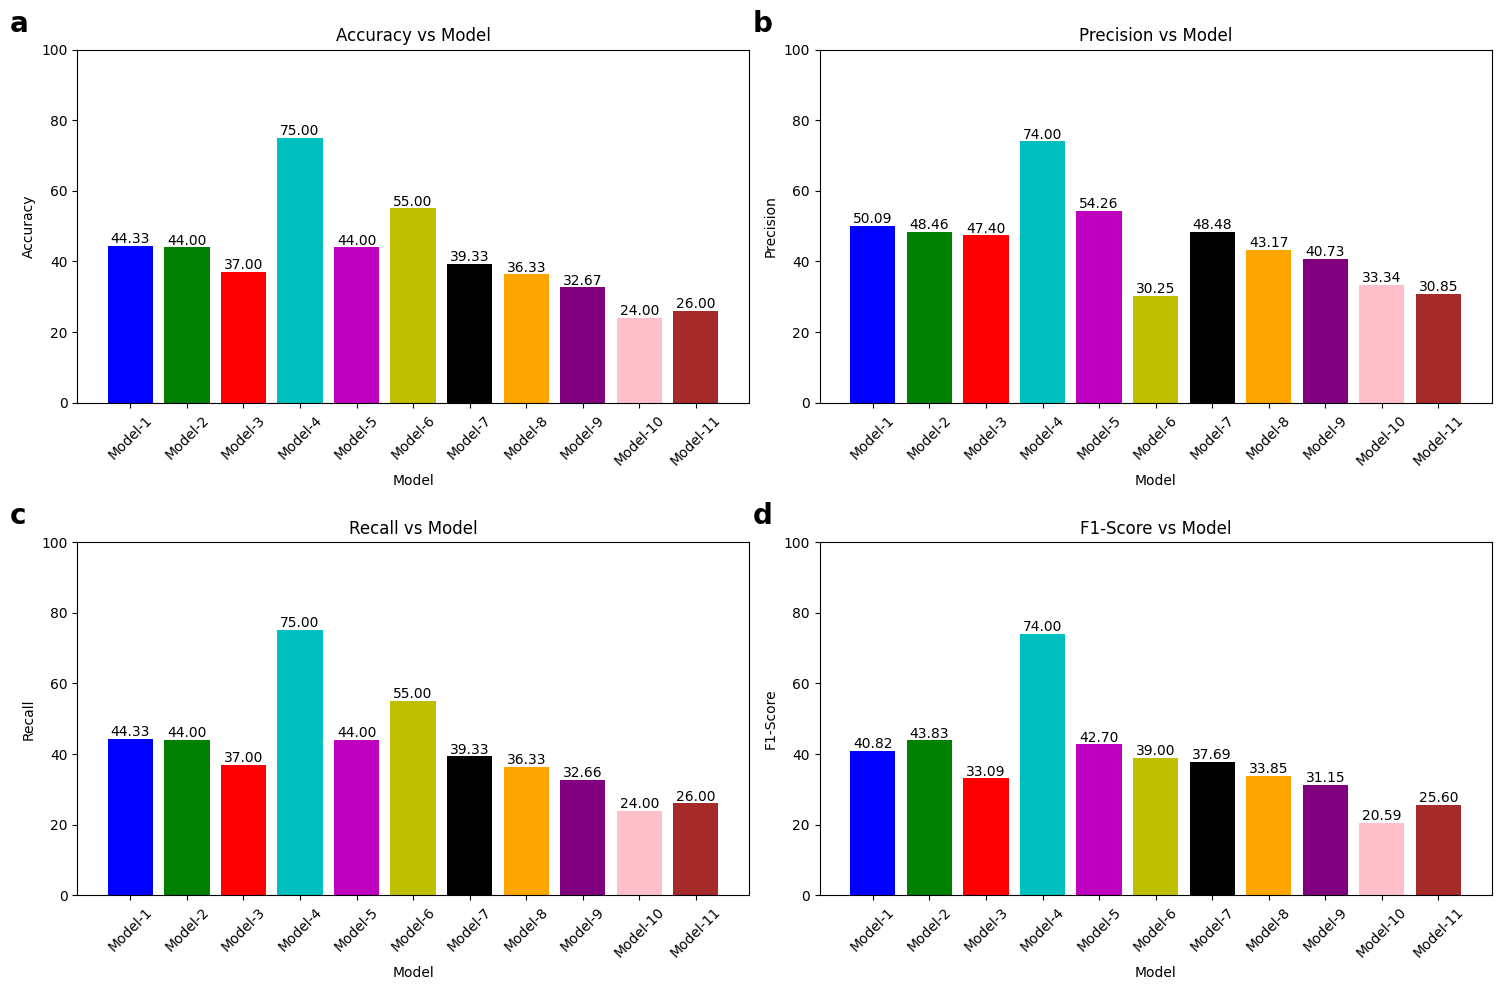

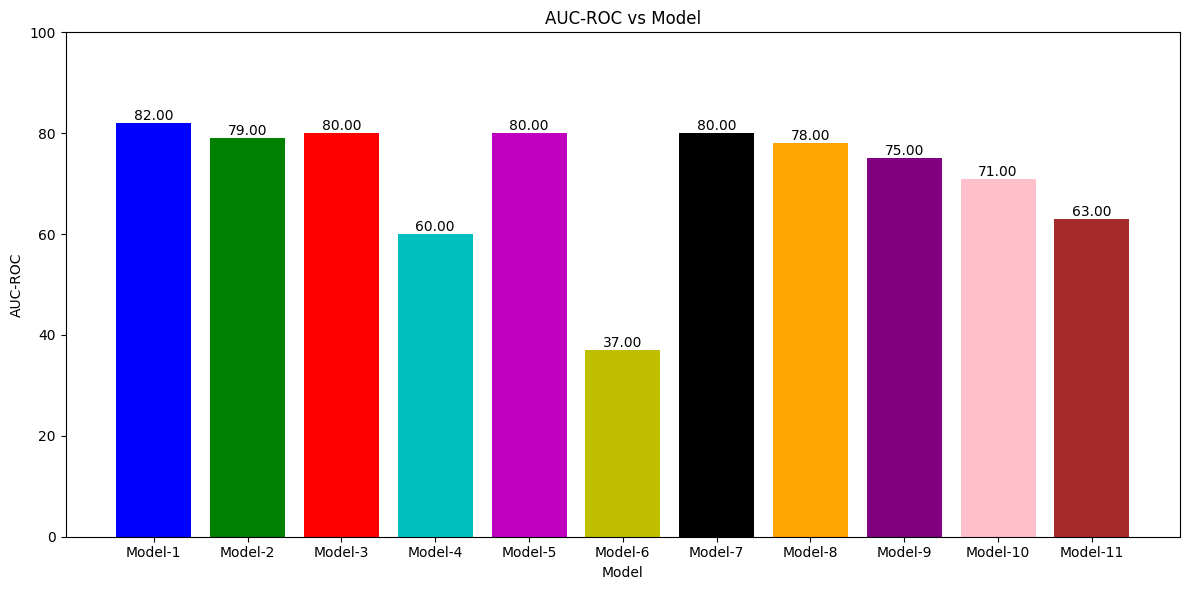

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Model-1', 'Model-2', 'Model-3', 'Model-4', 'Model-5', 'Model-6', 'Model-7', 'Model-8', 'Model-9', 'Model-10', 'Model-11']
accuracy = [44.33, 44, 37, 75, 44, 55, 39.33, 36.33, 32.67, 24, 26]
precision = [50.09, 48.46, 47.4, 74, 54.26, 30.25, 48.48, 43.17, 40.73, 33.34, 30.85]
recall = [44.33, 44, 37, 75, 44, 55, 39.33, 36.33, 32.66, 24, 26]
f1_score = [40.82, 43.83, 33.09, 74, 42.7, 39, 37.69, 33.85, 31.15, 20.59, 25.6]
auc_roc = [82, 79, 80, 60, 80, 37, 80, 78, 75, 71, 63]

# Colors for different models
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink', 'brown']

# Function to create bar plots in subplots
def create_subplot(ax, values, y_label, title, label):
    x = np.arange(len(models))
    bars = ax.bar(x, values, color=colors)
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=45)
    ax.set_xlabel('Model')
    ax.set_ylabel(y_label)
    ax.set_ylim(0, 100)
    ax.set_title(title)
    ax.text(-0.1, 1.05, label, transform=ax.transAxes, size=20, weight='bold')

    # Adding the values on top of the bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

# Plotting Accuracy, Precision, Recall, F1-Score in a single figure
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

create_subplot(axs[0, 0], accuracy, 'Accuracy', 'Accuracy vs Model', 'a')
create_subplot(axs[0, 1], precision, 'Precision', 'Precision vs Model', 'b')
create_subplot(axs[1, 0], recall, 'Recall', 'Recall vs Model', 'c')
create_subplot(axs[1, 1], f1_score, 'F1-Score', 'F1-Score vs Model', 'd')

plt.tight_layout()
plt.show()

# Plotting AUC-ROC in a separate figure
def create_auc_roc_plot(values, y_label, title):
    x = np.arange(len(models))
    plt.figure(figsize=(12, 6))
    bars = plt.bar(x, values, color=colors)
    plt.xticks(x, models, rotation=0)
    plt.xlabel('Model')
    plt.ylabel(y_label)
    plt.ylim(0, 100)
    plt.title(title)
    
    # Adding the values on top of the bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

create_auc_roc_plot(auc_roc, 'AUC-ROC', 'AUC-ROC vs Model')
